In [ ]:
### Variables reused across multiple cells, clear variables when switching between plotting cells

In [1]:
#Initial functions written by Pablo Millan https://github.com/millanp95 
# MLDSP and plotting functions adapted by me
import numpy as np
import matplotlib.pyplot as plt
import os
# from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import product
# from Bio import SeqIO

# input_file = "hcov_global.fasta"
# with open(input_file, "r") as infile:
#     first_record = next(SeqIO.parse(infile, "fasta"))  # Get the first record
#     seq = str(first_record.seq)

# seq = 'ATCGATCG'
# Random first 5501 nuc from Ontario covid genome
seq = 'AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAAAGAAATTTGACACCTTCAATGGGGAATGTCCAAATTTTGTATTTCCCTTAAATTCCATAATCAAGACTATTCAACCAAGGGTTGAAAAGAAAAAGCTTGATGGCTTTATGGGTAGAATTCGATCTGTCTATCCAGTTGCGTCACCAAATGAATGCAACCAAATGTGCCTTTCAACTCTCATGAAGTGTGATCATTGTGGTGAAACTTCATGGCAGACGGGCGATTTTGTTAAAGCCACTTGCGAATTTTGTGGCACTGAGAATTTGACTAAAGAAGGTGCCACTACTTGTGGTTACTTACCCCAAAATGCTGTTGTTAAAATTTATTGTCCAGCATGTCACAATTCAGAAGTAGGACCTGAGCATAGTCTTGCCGAATACCATAATGAATCTGGCTTGAAAACCATTCTTCGTAAGGGTGGTCGCACTATTGCCTTTGGAGGCTGTGTGTTCTCTTATGTTGGTTGCCATAACAAGTGTGCCTATTGGGTTCCACGTGCTAGCGCTAACATAGGTTGTAACCATACAGGTGTTGTTGGAGAAGGTTCCGAAGGTCTTAATGACAACCTTCTTGAAATACTCCAAAAAGAGAAAGTCAACATCAATATTGTTGGTGACTTTAAACTTAATGAAGAGATCGCCATTATTTTGGCATCTTTTTCTGCTTCCACAAGTGCTTTTGTGGAAACTGTGAAAGGTTTGGATTATAAAGCATTCAAACAAATTGTTGAATCCTGTGGTAATTTTAAAGTTACAAAAGGAAAAGCTAAAAAAGGTGCCTGGAATATTGGTGAACAGAAATCAATACTGAGTCCTCTTTATGCATTTGCATCAGAGGCTGCTCGTGTTGTACGATCAATTTTCTCCCGCACTCTTGAAACTGCTCAAAATTCTGTGCGTGTTTTACAGAAGGCCGCTATAACAATACTAGATGGAATTTCACAGTATTCACTGAGACTCATTGATGCTATGATGTTCACATCTGATTTGGCTACTAACAATCTAGTTGTAATGGCCTACATTACAGGTGGTGTTGTTCAGTTGACTTCGCAGTGGCTAACTAACATCTTTGGCACTGTTTATGAAAAACTCAAACCCGTCCTTGATTGGCTTGAAGAGAAGTTTAAGGAAGGTGTAGAGTTTCTTAGAGACGGTTGGGAAATTGTTAAATTTATCTCAACCTGTGCTTGTGAAATTGTCGGTGGACAAATTGTCACCTGTGCAAAGGAAATTAAGGAGAGTGTTCAGACATTCTTTAAGCTTGTAAATAAATTTTTGGCTTTGTGTGCTGACTCTATCATTATTGGTGGAGCTAAACTTAAAGCCTTGAATTTAGGTGAAACATTTGTCACGCACTCAAAGGGATTGTACAGAAAGTGTGTTAAATCCAGAGAAGAAACTGGCCTACTCATGCCTCTAAAAGCCCCAAAAGAAATTATCTTCTTAGAGGGAGAAACACTTCCTACAGAAGTGTTAACAGAGGAAGTTGTCTTGAAAACTGGTGATTTACAACCATTAGAACAACCTACTAGTGAAGCTGTTGAAGCTCCATTGGTTGGTACACCAGTTTGTATTAACGGGCTTATGTTGCTCGAAATCAAAGACACAGAAAAGTACTGTGCCCTTGCACCTAATATGATGGTAACAAACAATACCTTCACACTCAAAGGCGGTGCACCAACAAAGGTTACTTTTGGTGATGACACTGTGATAGAAGTGCAAGGTTACAAGAGTGTGAATATCACTTTTGAACTTGATGAAAGGATTGATAAAGTACTTAATGAGAAGTGCTCTGCCTATACAGTTGAACTCGGTACAGAAGTAAATGAGTTCGCCTGTGTTGTGGCAGATGCTGTCATAAAAACTTTGCAACCAGTATCTGAATTACTTACACCACTGGGCATTGATTTAGATGAGTGGAGTATGGCTACATACTACTTATTTGATGAGTCTGGTGAGTTTAAATTGGCTTCACATATGTATTGTTCTTTTTACCCTCCAGATGAGGATGAAGAAGAAGGTGATTGTGAAGAAGAAGAGTTTGAGCCATCAACTCAATATGAGTATGGTACTGAAGATGATTACCAAGGTAAACCTTTGGAATTTGGTGCCACTTCTGCTGCTCTTCAACCTGAAGAAGAGCAAGAAGAAGATTGGTTAGATGATGATAGTCAACAAACTGTTGGTCAACAAGACGGCAGTGAGGACAATCAGACAACTACTATTCAAACAATTGTTGAGGTTCAACCTCAATTAGAGATGGAACTTACACCAGTTGTTCAGACTATTGAAGTGAATAGTTTTAGTGGTTATTTAAAACTTACTGACAATGTATACATTAAAAATGCAGACATTGTGGAAGAAGCTAAAAAGGTAAAACCAACAGTGGTTGTTAATGCAGCCAATGTTTACCTTAAACATGGAGGAGGTGTTGCAGGAGCCTTAAATAAGGCTACTAACAATGCCATGCAAGTTGAATCTGATGATTACATAGCTACTAATGGACCACTTAAAGTGGGTGGTAGTTGTGTTTTAAGCGGACACAATCTTGCTAAACACTGTCTTCATGTTGTCGGCCCAAATGTTAACAAAGGTGAAGACATTCAACTTCTTAAGAGTGCTTATGAAAATTTTAATCAGCACGAAGTTCTACTTGCACCATTATTATCAGCTGGTATTTTTGGTGCTGACCCTATACATTCTTTAAGAGTTTGTGTAGATACTGTTCGCACAAATGTCTACTTAGCTGTCTTTGATAAAAATCTCTATGACAAACTTGTTTCAAGCTTTTTGGAAATGAAGAGTGAAAAGCAAGTTGAACAAAAGATCGCTGAGATTCCTAAAGAGGAAGTTAAGCCATTTATAACTGAAAGTAAACCTTCAGTTGAACAGAGAAAACAAGATGATAAGAAAATCAAAGCTTGTGTTGAAGAAGTTACAACAACTCTAGAAGAAACTAAGTTCCTCACAGAAAACTTGTTACTTTATATTGACATTAATGGCAATCTTCATCCAGATTCTGCCACTCTTGTTAGTGACATTGACATCACTTTCTTAAAGAAAGATGCTCCATATATAGTGGGTGATGTTGTTCAAGAGGGTGTTTTAACTGCTGTGGTTATACCTACTAAAAAGGCTGGTGGCACTACTGAAATGCTAGCGAAAGCTTTGAGAAAAGTGCCAACAGACAATTATATAACCACTTACCCGGGTCAGGGTTTAAATGGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAAGAAACACGCAAATTAATGCCTGTCTGTGTGGAAACTAAAGCCATAGTTTCAACTATACAGCGTAAATATAAGGGTATTAAAATACAAGAGGGTGTGGTTGATTATGGTGCTAGATTTTACTTTTACACCAGTAAAACAACTGTAGCGTCACTTATCAACACACTTAACGATCTAAATGAAACTCTTGTTACAATGCCACTTGGCTATGTAACACATGGCTTAAATTTGGAAGAAGCTGCTCGGTATATGAGATCTCTCAAAGTGCCAGCTACAGTTTCTGTTTCTTCACCTGATGCTGTTACAGCGTATAATGGTTATCTTACTTCTTCTTCTAAAACACCTGAAGAACATTTTATTGAAACCATCTCACTTGCTGGTTCCTATAAAGATTGGTCCTATTCTGGACAATCTACACAACTAGGTATAGAATTTCTTAAGAGAGGTGATAAAAGTGTATATTACACTAGTAATCCTACCACATTCCACCTAGATGGTGAAGTTATCACCTTTGACAATCTTAAGACACTTCTTTCTTTGAGAGAAGTGAGGACTATTAAGGTGTTTACAACAGTAGACAACATTAACCTCCACACGCAAGTTGTGGACATGTCAATGACATATGGACAACAGTTTGGTCCAACTTATTTGGATGGAGCTGATGTTACTAAAATAAAACCTCATAATTCACATGAAGGTAAAACATTTTATGTTTTACCTAATGATGACACTCTACGTGTTGAGGCTTTTGAGTACTACCACACAACTGATCTTAGTTTTCTGGGTAGGTACATGTCAGCATTAAATCACACTAAAAAGTGGAAATACCCACAAGTTAATGGTTTAACTTCTATTAAATGGGCAGATAACAACTGTTATCTTGCCACTGCATTGTTAACACTCCAACAAATAGAGTTGAAGTTTAATCCACCTGCTCTACAAGATGCTTATTACAGAGCAAGGGCTGGTGAAGCTGCTAACTTTTGTGCACTTATCTTAGCCTACTGTAATAAGACAGTAGGTGAGTTAGGTGATGTTAGAGAAACAATGAGTTACTTGTTTCAACATGCCAATTTAGATTCTTGCAAAAGAGTCTTGAACGTGGTGTGTAAAACTTGTGGACAACAACAGACAACCCTTAAG'

In [2]:
def kmer_count(seq, k, *args):
    """
    Compute the kmer counts for a given sequence up to a specified position.
    :param seq: DNA sequence
    :param k: Length of k-mer
    :optional param end_pos: Position up to which k-mers are counted
    :return: List of counts for each k-mer
    """
    kmerDict = {''.join(k_mer): 0 for k_mer in product('ACGT', repeat=k)}
    
    idx = 0
    try:
        while idx < end_pos - k + 1:
            kmer = seq[idx:idx + k]
            if kmer in kmerDict:
                kmerDict[kmer] += 1
            idx += 1
    except NameError:
        while idx < len(seq) - k + 1:
            kmer = seq[idx:idx + k]
            if kmer in kmerDict:
                kmerDict[kmer] += 1
            idx += 1
            
    return list(kmerDict.values())

In [3]:
def pos_gen(kmer):
    """
    Find the position of a particular kmer in the CGR.
    :param kmer: string with the kmer.
    :return: position in the CGR.
    """
    k = len(kmer)

    posx = 2 ** k
    posy = 2 ** k

    for i in range(1, k + 1):
        bp = kmer[-i]
        if bp == 'C':
            posx = posx - 2 ** (k - i)
            posy = posy - 2 ** (k - i)

        elif bp == 'A':
            posx = posx - 2 ** (k - i)

        elif bp == 'G':
            posy = posy - 2 ** (k - i)

    return int(posx - 1), int(posy - 1)


In [4]:
def cgr_gen(probs, k):
    """
    Generate CGR from the kmer counts for a given value of k.
    :param probs: array with the normalized kmer counts
    :param k:
    :return: 2D - CGR pattern.
    """
    kamers = product('ACGT', repeat=k)
    mat = np.zeros((2 ** k, 2 ** k))

    for i, kmer in enumerate(kamers):
        x, y = pos_gen(kmer)
        mat[y][x] = probs[i]

    return mat

In [20]:
def plot_cgr(mat, k, ax):
    """
    Plot the CGR matrix with correct k-mer labels and ticks at the vertices.
    :param mat: CGR matrix
    :param k: Length of k-mer
    :param ax: The axis to plot on
    """
    data = 1 - mat
    size = data.shape[0]  # Number of rows/columns in the matrix

    # Use extent to define coordinate space so that ticks align with vertices
    ax.imshow(data, cmap='gray', extent=[0,size,size,0])

    # Set ticks at each vertex (integer positions)
    tick_positions = [0,size]
    ax.set_yticks(tick_positions)
    ax.set_xticks([])
    ax.set_box_aspect(1)
    # Optional: Customize the tick labels if needed
    ax.set_yticklabels(['C', 'A'], fontsize=15 )

    # Create a twin y-axis on the right and set matching ticks
    ax_right = ax.twinx()
    ax_right.set_yticks(tick_positions)
    ax_right.set_yticklabels(['T','G'], fontsize=15 )

    # Generate all possible k-mers to label quadrants if k<5
    if k < 5:
        thresh = np.percentile(data, 30)
        for kmer in product('ACGT', repeat=k):
            kmer_str = ''.join(kmer)
            x, y = pos_gen(kmer)
            # sample the underlying pixel value, data is indexed [row=y, col=x]
            v = data[int(y), int(x)]
            # pick white on dark, black on light
            txt_color = 'white' if v < thresh else 'black'
            ax.text(x+0.5, y+0.5, kmer_str,
                    ha='center', va='center',
                    fontsize=max(4, 25 - (2**k)),
                    color=txt_color)



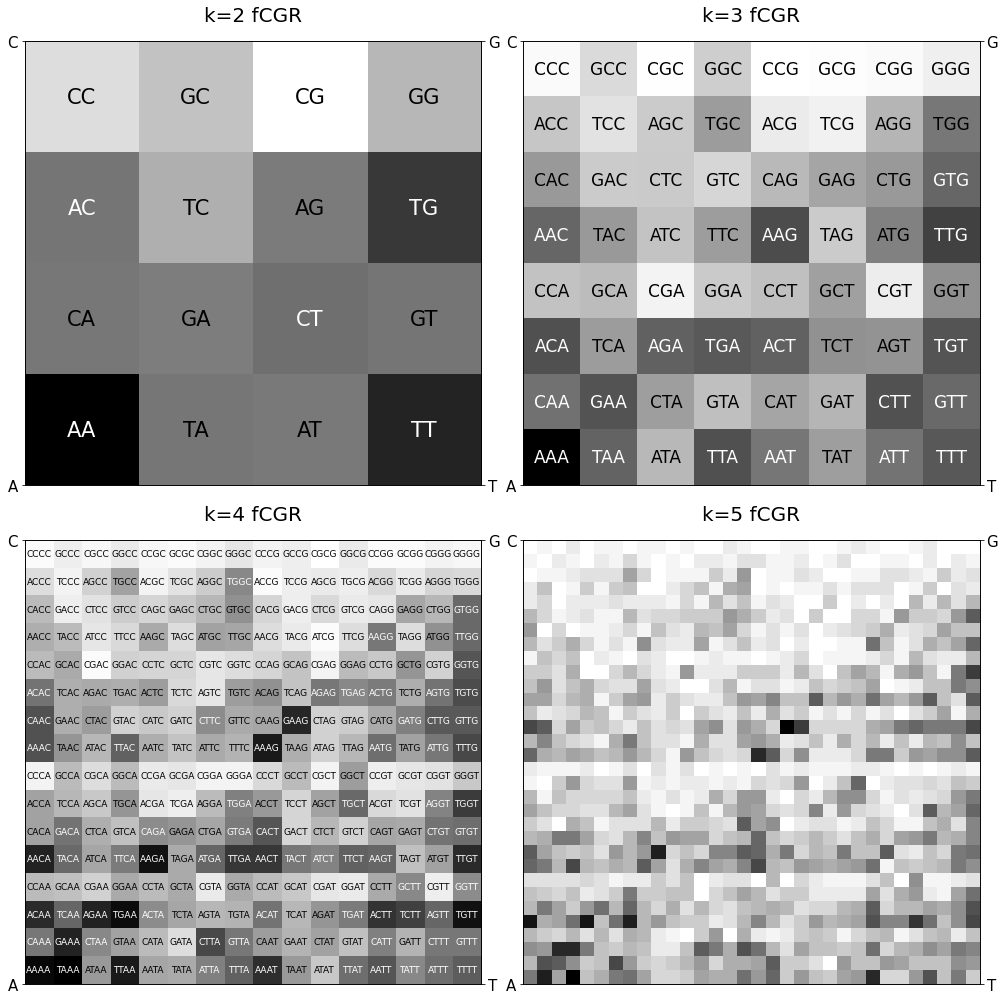

In [21]:
#  2x2 panel figure with increasing k and all k-mers labeled
k_values = [2, 3, 4, 5]  # specify desired k values

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

for i, k in enumerate(k_values):
    t = kmer_count(seq, k)
    t = [count / sum(t) for count in t]  # Normalize counts to probabilities
    mat = cgr_gen(t, k)
    plot_cgr(mat, k, axes[i])  # Pass the specific subplot axis to plot_cgr
    axes[i].set_title(f'k={k} fCGR', pad=20, fontsize=20)

plt.tight_layout()
plt.show()

In [22]:
#Pablo's function for cgr
def CGR(seq):
    seq = list(seq)
    d = {'A':(0,0),'C':(0,1), 'G':(1,1), 'T':(1,0) }
    x, y = 0.5, 0.5
    X, Y = [],[]
    i = 0 
    
    while seq:
        nucleotide = seq.pop(0)
        if nucleotide in d: 
            x += 0.5 * (d[nucleotide][0] - x)
            y += 0.5 * (d[nucleotide][1] - y)
            X.append(x)
            Y.append(y)
            i += 1
        
    return X, Y

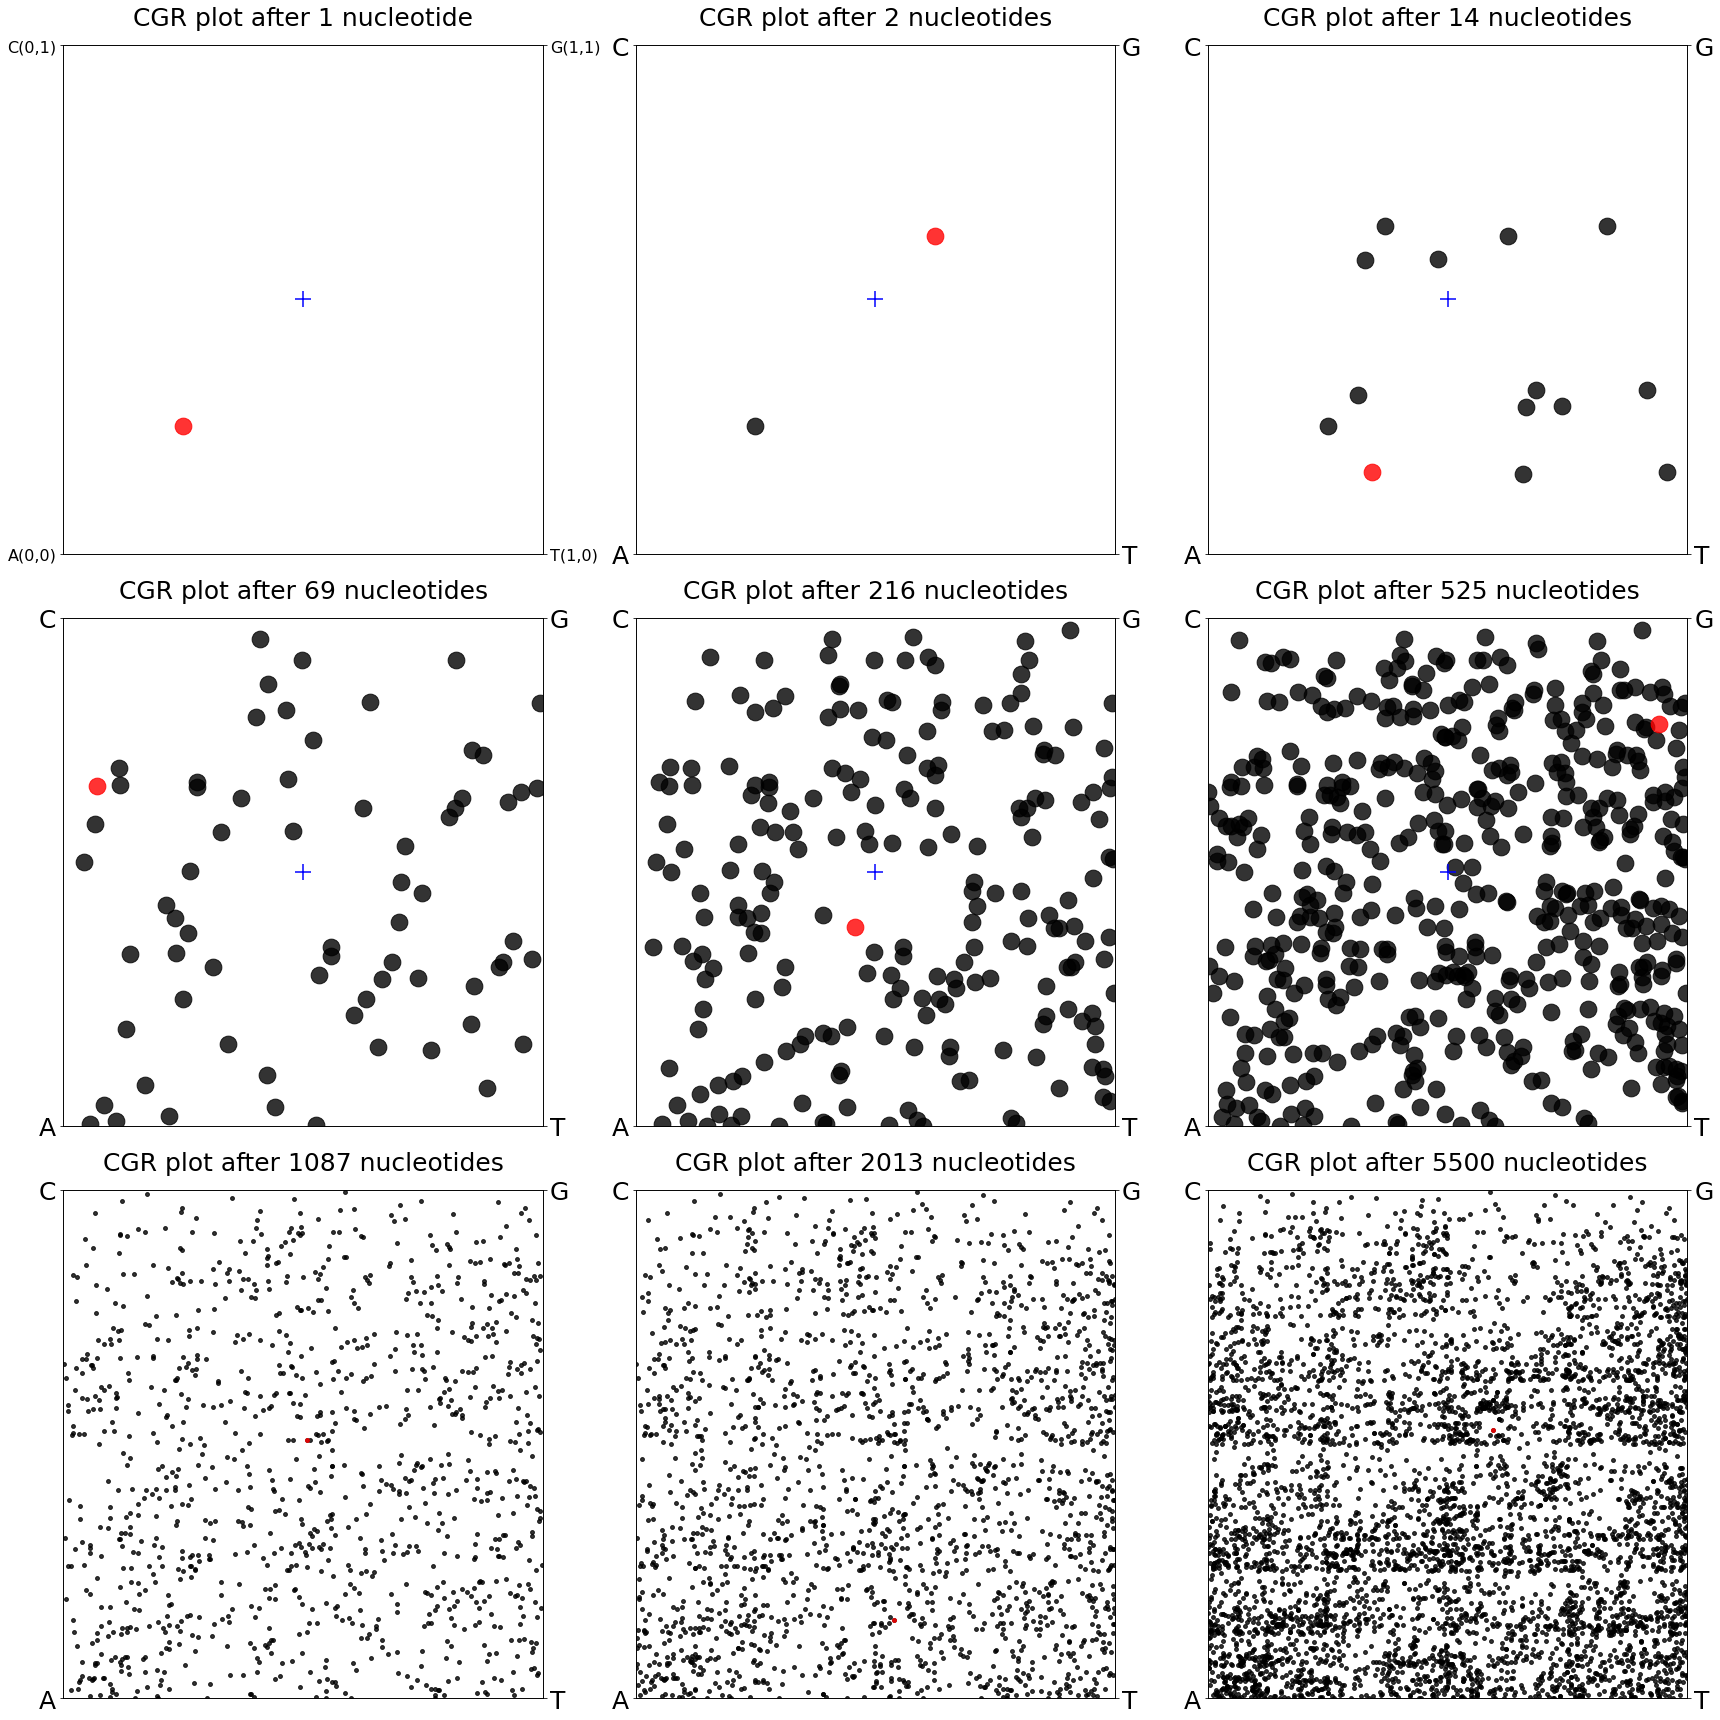

In [8]:
# Traditional cgr figure, blue cross at origin, last nucleotide plotted in red,
k = 1 # starting nucleotide

# Manually specify seq length to plot. len(positions) dictates number of subplots
# positions = [k,k+1,k+2,k+7,k+97,k+997] 

# Automatically split seq into z parts and plot z subplots, decrease z if final subplots of figure should be custom k values or trad CGR (see comments below)
z = 9
# positions = [k]+[int(round(pos*len(seq)/z)) for pos in range(1,z-1)] + [len(seq)] # position to plot, at every 1/x of seq length 
    #exponentially increase nucleotide position to plot (bias towards start of sequence instead of linear), uncomment below, comment above
positions = [k]+[int(round(((pos/z)**4)*(len(seq)-1)))+1 for pos in range(1,z-1)] + [len(seq)]

fig, axes = plt.subplots(3, 3, figsize=(24, 24))
axes = axes.flatten()

for i, end_pos in enumerate(positions):
    x, y = CGR(seq[0:end_pos])
    # show origin cross and larger dots for first 6 subplots
    if i < 6:
        axes[i].scatter(x[0:-1], y[0:-1], s=280, alpha=0.8, color='black')
        # plot last point in red
        axes[i].scatter(x[-1], y[-1], s=280, alpha=0.8, color='red')
        # plot starting point in blue
        axes[i].scatter(0.5, 0.5, s=280, marker='+', alpha=1, color='blue')
    # don't show blue cross for last fig row
    else:
        axes[i].scatter(x, y, s=15, alpha=0.8, color='black')
        axes[i].scatter(x[-1], y[-1], s=15, alpha=0.8, color='red')
    # Set aspect ratio to 'auto' to fit the entire box
    axes[i].set_aspect('auto')
    # Manually set y-limits to align ticks with the vertices
    axes[i].set_ylim(0, 1)
    axes[i].set_xlim(0, 1)
    axes[i].set_yticks([0, 1])
    axes[i].set_xticks([])  # Remove x-axis ticks if not needed
    # Customize the left y-axis tick labels
    axes[i].set_yticklabels(['A', 'C'], fontsize=25)
    # Create a twin y-axis on the right with matching y-limits and tick positions
    ax_right = axes[i].twinx()
    ax_right.set_ylim(0, 1)
    ax_right.set_yticks([0, 1])
    ax_right.set_yticklabels(['T', 'G'], fontsize=25)
    # Add title for the scatter plot
    if i == 0:
        axes[i].set_title(f'CGR plot after {end_pos} nucleotide', pad=20, fontsize=25)
        axes[i].set_yticklabels(['A(0,0)', 'C(0,1)'], fontsize=16)
        ax_right.set_yticklabels(['T(1,0)', 'G(1,1)'], fontsize=16)
    else:
        axes[i].set_title(f'CGR plot after {end_pos} nucleotides', pad=20,fontsize=25)


plt.tight_layout()
plt.show()


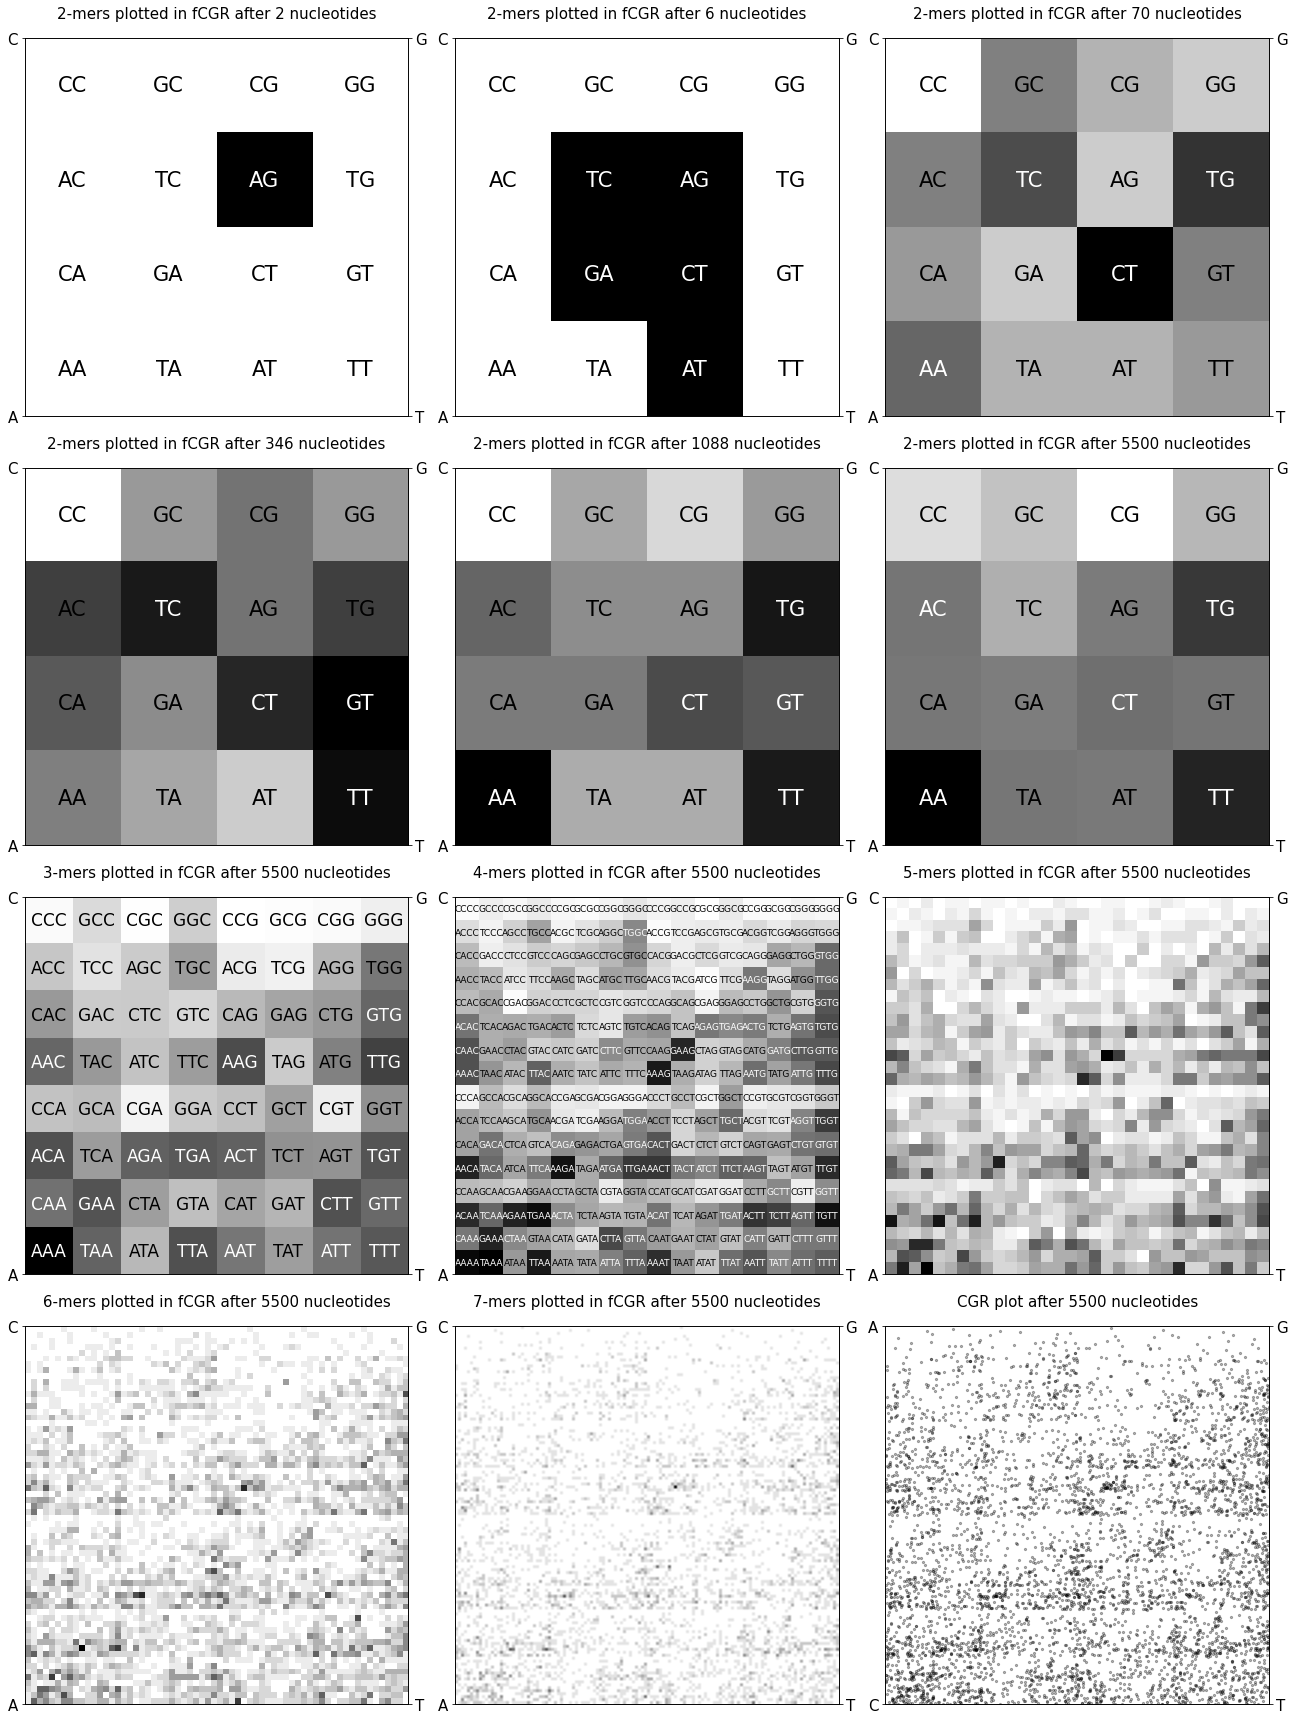

In [23]:
# 3 x Y panel figure with cumulative fCGR k-mers, starts at k nucleotide. Last subplots can be custom with increasing k value or trad cgr. Used for methods figure
k = 2  # k-mer length for subplots

# Manually specify seq length to plot. len(positions) dictates number of subplots
# positions = [k,k+1,k+2,k+7,k+97,k+997] 

# Automatically split seq into z parts and plot z subplots, decrease z if final subplots of figure should be custom k values or trad CGR (see comments below)
z = 6
# positions = [k]+[int(round(pos*len(seq)/z)) for pos in range(1,z-1)] + [len(seq)]  # position to plot, at every 1/x of seq length 
    #exponentially increase nucleotide position to plot (bias towards start of sequence instead of linear), uncomment below, comment above
positions = [k]+[int(round(((pos/z)**4)*(len(seq)-1)))+k for pos in range(1,z-1)] + [len(seq)]

fig, axes = plt.subplots(4, 3, figsize=(18, 24)) #figsize must be inversly proprotional to subplots to keep CGR square (n/a for yxy plots)
axes = axes.flatten()
for i, end_pos in enumerate(positions):
    t = kmer_count(seq, k, end_pos)
    t = [count / sum(t) for count in t]  # Normalize counts to probabilities
    mat = cgr_gen(t, k)
    plot_cgr(mat, k, axes[i])
    axes[i].set_title(f'{k}-mers plotted in fCGR after {end_pos} nucleotides', pad=20, fontsize=15)
    
# #Uncomment for fcgr of different k in next subplots
k_values = [3, 4, 5, 6, 7]
for j, k in enumerate(k_values):
    i += 1
    t = kmer_count(seq, k)
    t = [count / sum(t) for count in t]  # Normalize counts to probabilities
    mat = cgr_gen(t, k)
    plot_cgr(mat, k, axes[i])  # Pass the specific subplot axis to plot_cgr
    axes[i].set_title(f'{k}-mers plotted in fCGR after {len(seq)} nucleotides', pad=20, fontsize=15)

#Uncomment if you want a traditional CGR as last subplot
i += 1
x, y = CGR(seq)
axes[i].scatter(x, y, s=5, alpha=0.3, color='black')
# Set aspect ratio to 'auto' to fit the entire box
axes[i].set_aspect('auto')
# Manually set y-limits to align ticks with the vertices
axes[i].set_ylim(0, 1)
axes[i].set_xlim(0, 1)
axes[i].set_yticks([0, 1])
axes[i].set_xticks([])  # Remove x-axis ticks if not needed
# Customize the left y-axis tick labels
axes[i].set_yticklabels(['C', 'A'], fontsize=15)
# Create a twin y-axis on the right with matching y-limits and tick positions
ax_right = axes[i].twinx()
ax_right.set_ylim(0, 1)
ax_right.set_yticks([0, 1])
ax_right.set_yticklabels(['T', 'G'], fontsize=15)
# Add title for the scatter plot
axes[i].set_title(f'CGR plot after {len(seq)} nucleotides', pad=20, fontsize=15)

plt.tight_layout()
plt.show()

5500


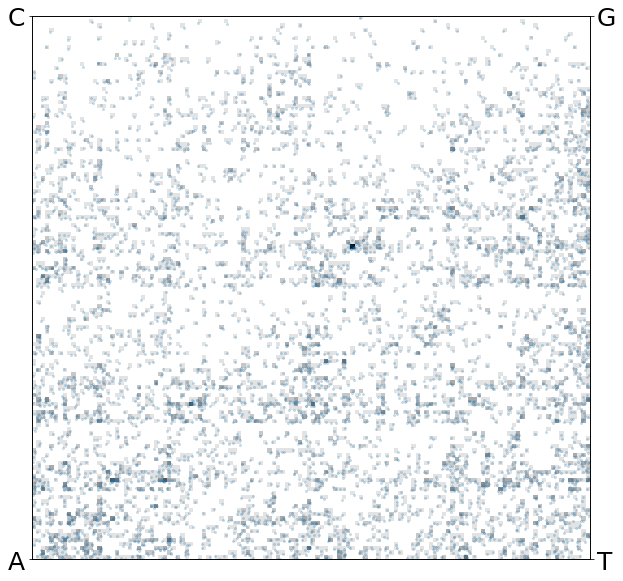

In [24]:
#Fig with CGR & fCGR layed on top, run 3 times for cgr vs fcgr figure
seq.replace(' ','')
print(len(seq))
extent = 0, 1, 0, 1

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Traditional CGR
x, y = CGR(seq)
ax.scatter(x, y, s=4, alpha=0.2)

# fCGR
k = 7
t = kmer_count(seq, k)
t = cgr_gen(t, k)
ax.imshow(1 - t, alpha=1, extent=extent, cmap='gray')

# Quadrant labels
tick_positions = [0, 1]  # Positions for the edges of the plot (min and max)
ax.set_yticks(tick_positions)  # Set y-ticks for the left axis
ax.set_yticklabels(['A', 'C'], fontsize=25)  # Left y-axis quadrant labels
ax.set_xticks([])  # Hide x-ticks (optional, as we don't label quadrants on x-axis here)
ax.set_box_aspect(1)  # Ensure the plot is square

# Create a twin y-axis on the right and set matching ticks
ax_right = ax.twinx()  # Twin the y-axis
ax_right.set_yticks(tick_positions)  # Set y-ticks for the right axis
ax_right.set_yticklabels(['T', 'G'], fontsize=25)  # Right y-axis quadrant labels


plt.show()

5500


Text(0.5, -0.12, 'd)')

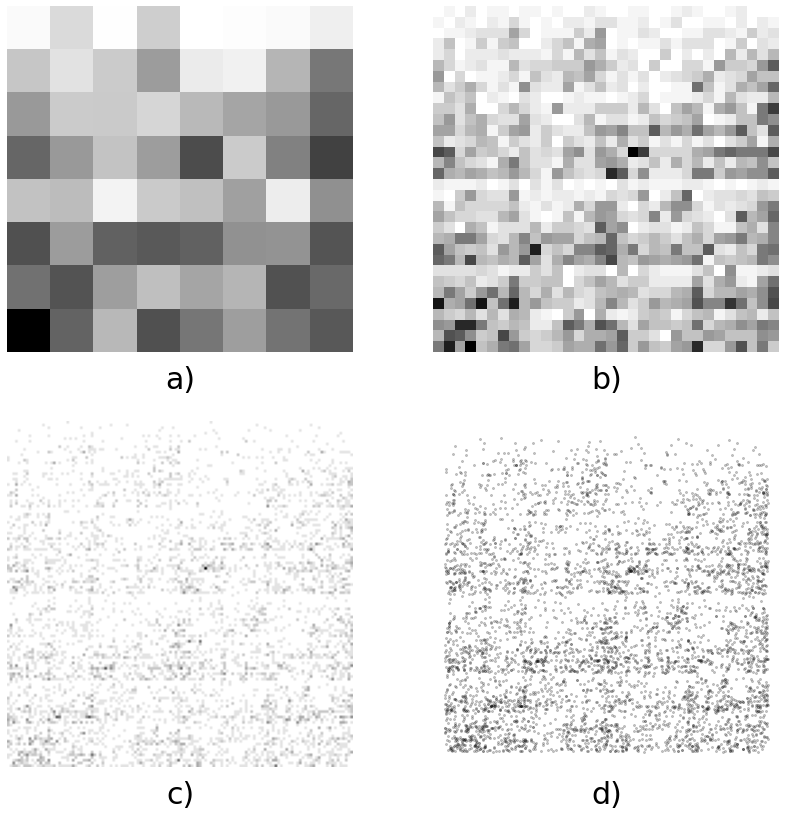

In [25]:
#Create a 2x2 figure first 3 subfigs are fcgr, last is traditional CGR
seq.replace(' ','')
print(len(seq))
extent = 0, 1, 0, 1

fig, ax = plt.subplots(2, 2, figsize=(14, 14))  # 2x2 grid with a square figure size for equal plots

k = 3
t = kmer_count(seq, k)
t = t / np.sum(t)
t = cgr_gen(t, k)
plt.gray()
ax[0, 0].imshow(1 - t, alpha=1, extent=extent)
ax[0, 0].set_axis_off()
ax[0, 0].set_title('a)', fontsize=30, y=-0.12)

k = 5
t = kmer_count(seq, k)
t = t / np.sum(t)
t = cgr_gen(t, k)
plt.gray()
ax[0, 1].imshow(1 - t, alpha=1, extent=extent)
ax[0, 1].set_axis_off()
ax[0, 1].set_title('b)', fontsize=30, y=-0.12)

k = 7
t = kmer_count(seq, k)
t = t / np.sum(t)
t = cgr_gen(t, k)
ax[1, 0].imshow(1 - t, alpha=1, extent=extent)
ax[1, 0].set_axis_off()
ax[1, 0].set_title('c)', fontsize=30, y=-0.12)

x, y = CGR(seq)
ax[1, 1].scatter(x, y, s=4, alpha=0.2, color='black')
ax[1, 1].set_axis_off()
ax[1, 1].set_title('d)', fontsize=30, y=-0.12)

# plt.tight_layout()
# plt.savefig('CGR_scale.png')
# plt.show()


In [13]:
# Plot already created CGR figures for thesis, will be updated in MLDSP code eventually
def plot_cgr_individual(mat, k, ax):
    """
    Plot a CGR numpy array in an individual figure with vertices labeled.

    :param mat: 2D numpy array representing the CGR matrix.
    :param k: Length of k-mers used for the CGR.
    :param title: Title for the plot.
    """
    data = 1 - mat
    size = data.shape[0]  # Number of rows/columns in the matrix

    # Use extent to define coordinate space so that ticks align with vertices
    ax.imshow(data, cmap='gray', extent=[0,size,size,0])
    # Set ticks at each vertex (integer positions)
    tick_positions = [0,size]
    ax.set_yticks(tick_positions)
    ax.set_xticks([])
    ax.set_box_aspect(1)
    # Optional: Customize the tick labels if needed
    ax.set_yticklabels(['C', 'A'], fontsize=40)

    # Create a twin y-axis on the right and set matching ticks
    ax_right = ax.twinx()
    ax_right.set_box_aspect(1) #not in plot_cgr

    # Set matching y-ticks and labels
    ax_right.set_yticks(tick_positions)
    ax_right.set_yticklabels(['T', 'G'], fontsize=40)

    # Hide the bottom spine of the twin axis to avoid double lines
    ax_right.spines['bottom'].set_visible(False)

In [ ]:
# Make individual figure for each cgr using plot_cgr_individual for thesis, will be updated in MLDSP code eventually

path = '/Users/dolteanu/local_documents/Coding/MSc_github/Results/Ontario_epochs_3/Num_rep'
output_dir = '/Users/dolteanu/Documents/Masters/Thesis/Figures/Ontario_epochs'

cgr_dict = {"Epoch_2": "cgr_k=7_Canada_ON-UHTC_0335_2020.npy",
"Epoch_3": "cgr_k=7_Canada_ON-PHL-21-06822_2021.npy",
"Epoch_1": "cgr_k=7_Canada_ON-UHTC_0043_2020.npy",
"Epoch_0": "cgr_k=7_Canada_ON-PHL-3917_2020.npy",
"Epoch_4": "cgr_k=7_Canada_ON-SHL-21-01481_2021.npy"}

for name, file_path in cgr_dict.items():
    input_path = os.path.join(path,file_path)
    mat = np.load(input_path)
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_cgr_individual(mat, k=7, ax=ax)
    dataset = os.path.basename(output_dir)
    output_path = os.path.join(output_dir, f"{name}_cgr_{dataset}.pdf")
    plt.tight_layout()
    # plt.savefig(output_path,format='pdf')
    plt.close(fig)
